# Installing the required packages

In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install torch
!pip3 install -Uqq fastbook
!pip3 install --user graphviz
print("Done")

Done


# Importing the required packages

In [2]:
import numpy as np
import pandas as pd
import torch
from fastai.tabular.all import *

/home/abhisar/anaconda3/envs/fastai_env/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# Data Preparation


## Load and View the Data



In [3]:
raw_loaded_data = pd.read_csv('emotions.csv')
raw_loaded_data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
negative = 2
positive = 1
neutral = 0

In [5]:
raw_loaded_data['label'].replace("NEGATIVE", negative, inplace=True)
raw_loaded_data['label'].replace("POSITIVE", positive, inplace=True)
raw_loaded_data['label'].replace("NEUTRAL", neutral, inplace=True)

In [6]:
raw_loaded_data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,2
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,0


In [7]:
# Splitting the loaded dataset into the Training, Testing, and Validation
split_percentage = 0.9

# Set for training and validating the model
training_data = raw_loaded_data.head(int(len(raw_loaded_data) * split_percentage)).copy()

# Set for validating the model which we will use once training has finished
test_data = raw_loaded_data.tail(int(len(raw_loaded_data) * (1 - split_percentage))).copy()

In [8]:
training_data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.150,...,23.50,20.30,20.30,23.50,-215.00,280.00,-162.00,-162.00,280.00,2
1,28.80,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.820,...,-23.30,-21.80,-21.80,-23.30,182.00,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.030,...,462.00,-233.00,-233.00,462.00,-267.00,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.970,...,299.00,-243.00,-243.00,299.00,132.00,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.520,...,12.00,38.10,38.10,12.00,119.00,-17.60,23.90,23.90,-17.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,12.50,30.4,-144.0,10.70,30.5,-1.190,-3.340,1.590,0.378,-1.310,...,207.00,-59.20,-59.20,207.00,-154.00,145.00,-104.00,-104.00,145.00,2
1914,3.62,31.0,-19.2,-22.00,23.8,-24.000,-1.900,35.900,5.200,4.240,...,-21.70,4.77,4.77,-21.70,102.00,-10.80,59.70,59.70,-10.80,1
1915,5.28,26.6,-307.0,4.19,28.1,3.710,-1.420,-0.185,3.780,0.292,...,484.00,-204.00,-204.00,484.00,-1.26,74.40,-16.40,-16.40,74.40,2
1916,28.40,31.7,-165.0,22.30,26.3,3.300,-5.780,-1.140,-7.350,3.720,...,291.00,-199.00,-199.00,291.00,62.90,-15.60,-88.80,-88.80,-15.60,2


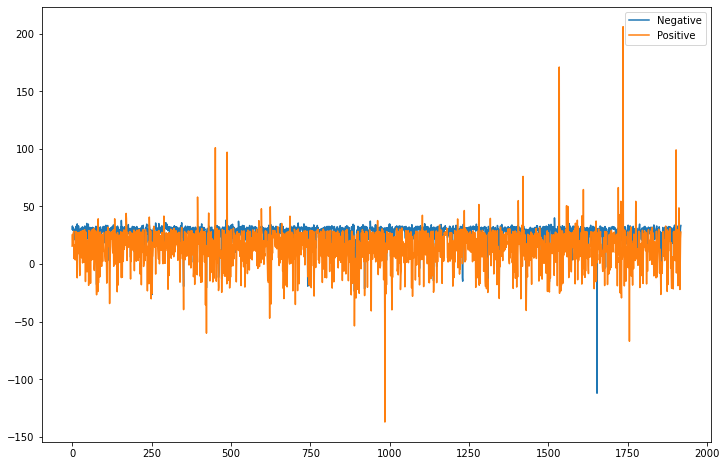

In [9]:
x_values = training_data.values[:,1:-1]
x_values = x_values.transpose()


# Set the size of the chart
plt.figure(figsize=(12,8))

# Plot data labeled 1 - Seizure
plt.plot(x_values[0, :], label="Negative")

# Plot data labeled 2 - No Seizure
# plt.plot(x_values[1, :], label="Neutral")

# Plot data labeled 3 - No Seizure
plt.plot(x_values[2, :], label="Positive")

# Create a legend and output the graph
plt.legend()
plt.show()

In [10]:
# View training data
training_data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.150,...,23.50,20.30,20.30,23.50,-215.00,280.00,-162.00,-162.00,280.00,2
1,28.80,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.820,...,-23.30,-21.80,-21.80,-23.30,182.00,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.030,...,462.00,-233.00,-233.00,462.00,-267.00,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.970,...,299.00,-243.00,-243.00,299.00,132.00,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.520,...,12.00,38.10,38.10,12.00,119.00,-17.60,23.90,23.90,-17.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,12.50,30.4,-144.0,10.70,30.5,-1.190,-3.340,1.590,0.378,-1.310,...,207.00,-59.20,-59.20,207.00,-154.00,145.00,-104.00,-104.00,145.00,2
1914,3.62,31.0,-19.2,-22.00,23.8,-24.000,-1.900,35.900,5.200,4.240,...,-21.70,4.77,4.77,-21.70,102.00,-10.80,59.70,59.70,-10.80,1
1915,5.28,26.6,-307.0,4.19,28.1,3.710,-1.420,-0.185,3.780,0.292,...,484.00,-204.00,-204.00,484.00,-1.26,74.40,-16.40,-16.40,74.40,2
1916,28.40,31.7,-165.0,22.30,26.3,3.300,-5.780,-1.140,-7.350,3.720,...,291.00,-199.00,-199.00,291.00,62.90,-15.60,-88.80,-88.80,-15.60,2


In [11]:
# View testing data
test_data = test_data.reset_index(drop=True)
test_data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,9.060,25.8,-320.0,6.0700,30.4,1.65,-1.97,3.560,2.320,-1.92,...,205.00,-84.100,-84.100,205.00,-43.4,135.00,-89.7,-89.7,135.00,2
1,4.320,29.5,22.0,3.2100,24.7,3.24,3.15,1.450,3.280,-2.28,...,51.70,-105.000,-105.000,51.70,120.0,18.50,-19.8,-19.8,18.50,1
2,-1.350,16.4,-515.0,0.0133,25.5,-3.35,-1.58,0.186,0.521,-2.92,...,501.00,-251.000,-251.000,501.00,-678.0,624.00,-295.0,-295.0,624.00,2
3,13.400,31.3,119.0,20.5000,25.2,4.27,1.69,-113.000,-1.870,-3.92,...,-58.90,32.200,32.200,-58.90,34.6,82.60,-46.3,-46.3,82.60,1
4,29.700,31.7,29.8,26.8000,25.5,-5.31,-1.22,1.880,-2.230,-3.20,...,-3.19,17.800,17.800,-3.19,124.0,-2.29,17.4,17.4,-2.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,32.400,32.2,32.2,30.8000,23.4,1.64,-2.03,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.2,47.2,-19.90,0
209,16.300,31.3,-284.0,14.3000,23.9,4.20,1.09,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.8,-59.8,142.00,1
210,-0.547,28.3,-259.0,15.8000,26.7,9.08,6.90,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.5,-10.5,-169.00,2
211,16.800,19.9,-288.0,8.3400,26.0,2.46,1.58,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.0,-271.0,552.00,2


# Training, Building and Testing the Model

## Building the Dataloaders

In [12]:
# Loading the data for independent variables - will be used in a relationship with the independent data - the "label" column
dependent_names_data = list(training_data.columns.values)
# Remove the independent variable from the training data
dependent_names_data.remove('label')

In [24]:
# Creating the splitters needed for building the dataloaders
splits = RandomSplitter(valid_pct=0.3, seed=None)(range_of(training_data))

# Creating the DataLoaders
training_data_loaders = TabularPandas(
    training_data,
    cont_names = dependent_names_data,
    procs = [FillMissing, Categorify],
    splits = splits,
    y_block = CategoryBlock,
    y_names= "label"
)

In [25]:
# Show the training data that will be used for training the model
dls = training_data_loaders.dataloaders(bs=256)
dls.show_batch()

## Train the Model

0.010000000149011612
0.001737800776027143


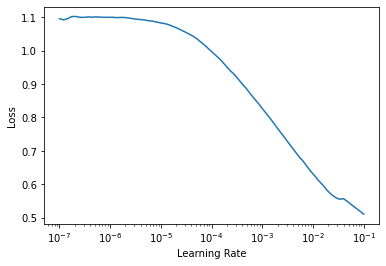

In [26]:
# Build the tabular learner model that will simulate finding the best learning rate.
learn = tabular_learner(dls, metrics=[accuracy, error_rate])
lr_min, lr_steep = learn.lr_find()
print(lr_min)
print(lr_steep)

# Once the learning rate(s) have been determined, store them in two variables, lr_min and lr_steep that will be used while training. 

In [27]:
# Fit the model on 100 epochs on the minimal learning rate
learn.fit(n_epoch=5, lr=lr_min)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.555239,1.747595,0.744348,0.255652,00:00
1,0.376989,0.599558,0.834783,0.165217,00:00
2,0.284951,0.575347,0.852174,0.147826,00:00
3,0.239225,0.264744,0.907826,0.092174,00:00
4,0.201824,0.204825,0.926957,0.073043,00:00


In [28]:
# Show the results of the model training 
learn.show_results()

## Save the trained model

In [29]:
model_name = "Emotion_Detector"
torch.save(learn, model_name + ".pt")
print("Saved the model using torch")

Saved the model using torch


## Testing the Model

In [30]:
# Reload the model with Eval Parameters
model = torch.load(model_name + ".pt")
model.eval()

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(2548, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(2548, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=2548, out_features=200, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=200, out_features=100, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=3, bias=True)
    )
  )
)

In [31]:
# Function that gets the row given the index of the test set
def get_row(row_number):
    row = test_data.iloc[row_number].iloc[:-1]
    return row

In [32]:
row_num = 208
row, clas, probs = model.predict(get_row(row_num))
row.show()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,mean_d_30_a,mean_d_31_a,mean_d_32_a,mean_d_33_a,mean_d_34_a,mean_d_35_a,mean_d_36_a,mean_d_37_a,mean_d_38_a,mean_d_39_a,mean_d_40_a,mean_d_41_a,mean_d_42_a,mean_d_43_a,mean_d_44_a,mean_d_45_a,mean_d_46_a,mean_d_47_a,mean_d_48_a,mean_d_49_a,stddev_0_a,stddev_1_a,stddev_2_a,stddev_3_a,stddev_4_a,stddev_d_0_a,stddev_d_1_a,stddev_d_2_a,stddev_d_3_a,stddev_d_4_a,moments_0_a,moments_1_a,moments_2_a,moments_3_a,moments_4_a,moments_5_a,moments_6_a,moments_7_a,moments_8_a,moments_9_a,moments_10_a,moments_11_a,moments_12_a,moments_13_a,moments_14_a,moments_15_a,moments_16_a,moments_17_a,moments_18_a,moments_19_a,max_0_a,max_1_a,max_2_a,max_3_a,max_4_a,max_d_0_a,max_d_1_a,max_d_2_a,max_d_3_a,max_d_4_a,max_q_0_a,max_q_1_a,max_q_2_a,max_q_3_a,max_q_4_a,max_q_5_a,max_q_6_a,max_q_7_a,max_q_8_a,max_q_9_a,max_q_10_a,max_q_11_a,max_q_12_a,max_q_13_a,max_q_14_a,max_q_15_a,max_q_16_a,max_q_17_a,max_q_18_a,max_q_19_a,max_q_20_a,max_q_21_a,max_q_22_a,max_q_23_a,max_q_24_a,max_q_25_a,max_q_26_a,max_q_27_a,max_q_28_a,max_q_29_a,max_q_30_a,max_q_31_a,max_q_32_a,max_q_33_a,max_q_34_a,max_q_35_a,max_q_36_a,max_q_37_a,max_q_38_a,max_q_39_a,max_q_40_a,max_q_41_a,max_q_42_a,max_q_43_a,max_q_44_a,max_q_45_a,max_q_46_a,max_q_47_a,max_q_48_a,max_q_49_a,min_0_a,min_1_a,min_2_a,min_3_a,min_4_a,min_d_0_a,min_d_1_a,min_d_2_a,min_d_3_a,min_d_4_a,min_q_0_a,min_q_1_a,min_q_2_a,min_q_3_a,min_q_4_a,min_q_5_a,min_q_6_a,min_q_7_a,min_q_8_a,min_q_9_a,min_q_10_a,min_q_11_a,min_q_12_a,min_q_13_a,min_q_14_a,min_q_15_a,min_q_16_a,min_q_17_a,min_q_18_a,min_q_19_a,min_q_20_a,min_q_21_a,min_q_22_a,min_q_23_a,min_q_24_a,min_q_25_a,min_q_26_a,min_q_27_a,min_q_28_a,min_q_29_a,min_q_30_a,min_q_31_a,min_q_32_a,min_q_33_a,min_q_34_a,min_q_35_a,min_q_36_a,min_q_37_a,min_q_38_a,min_q_39_a,min_q_40_a,min_q_41_a,min_q_42_a,min_q_43_a,min_q_44_a,min_q_45_a,min_q_46_a,min_q_47_a,min_q_48_a,min_q_49_a,covmat_0_a,covmat_1_a,covmat_2_a,covmat_3_a,covmat_4_a,covmat_5_a,covmat_6_a,covmat_7_a,covmat_8_a,covmat_9_a,covmat_10_a,covmat_11_a,covmat_12_a,covmat_13_a,covmat_14_a,covmat_15_a,covmat_16_a,covmat_17_a,covmat_18_a,covmat_19_a,covmat_20_a,covmat_21_a,covmat_22_a,covmat_23_a,covmat_24_a,covmat_25_a,covmat_26_a,covmat_27_a,covmat_28_a,covmat_29_a,covmat_30_a,covmat_31_a,covmat_32_a,covmat_33_a,covmat_34_a,covmat_35_a,covmat_36_a,covmat_37_a,covmat_38_a,covmat_39_a,covmat_40_a,covmat_41_a,covmat_42_a,covmat_43_a,covmat_44_a,covmat_45_a,covmat_46_a,covmat_47_a,covmat_48_a,covmat_49_a,covmat_50_a,covmat_51_a,covmat_52_a,covmat_53_a,covmat_54_a,covmat_55_a,covmat_56_a,covmat_57_a,covmat_58_a,covmat_59_a,covmat_60_a,covmat_61_a,covmat_62_a,covmat_63_a,covmat_64_a,covmat_65_a,covmat_66_a,covmat_67_a,covmat_68_a,covmat_69_a,covmat_70_a,covmat_71_a,covmat_72_a,covmat_73_a,covmat_74_a,covmat_75_a,covmat_76_a,covmat_77_a,covmat_78_a,covmat_79_a,covmat_80_a,covmat_81_a,covmat_82_a,covmat_83_a,covmat_84_a,covmat_85_a,covmat_86_a,covmat_87_a,covmat_88_a,covmat_89_a,covmat_90_a,covmat_91_a,covmat_92_a,covmat_93_a,covmat_94_a,covmat_95_a,covmat_96_a,covmat_97_a,covmat_98_a,covmat_99_a,covmat_100_a,covmat_101_a,covmat_102_a,covmat_103_a,covmat_104_a,covmat_105_a,covmat_106_a,covmat_107_a,covmat_108_a,covmat_109_a,covmat_110_a,covmat_111_a,covmat_112_a,covmat_113_a,covmat_114_a,covmat_115_a,covmat_116_a,covmat_117_a,covmat_118_a,covmat_119_a,covmat_120_a,covmat_121_a,covmat_122_a,covmat_123_a,covmat_124_a,covmat_125_a,covmat_126_a,covmat_127_a,covmat_128_a,covmat_129_a,covmat_130_a,covmat_131_a,covmat_132_a,covmat_133_a,covmat_134_a,covmat_135_a,covmat_136_a,c

In [33]:
clas.int()

tensor(0, dtype=torch.int32)

In [37]:
correct = 0
wrong = 0

for i in range(1, 212):
    row, clas, probs = model.predict(get_row(i))
    # print(row)
    # print(clas)
    # print(probs)
    # break
    if clas.int() == test_data['label'][i]:
        correct += 1
    else:
        wrong += 1
print("Correct: ", correct)
print("Wrong: ", wrong)
# print("Percent: " + str(correct / (correct + wrong)))

Correct:  202
Wrong:  9
